# Покупка буренок

Введение:

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Цель проекта: 

Необходимо разработать модель машинного обучения на основе предоставленных данных о коровах и качестве молока. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. Нужно будет разработать две модели: одна модель будет прогносировать удой за год - не менее 6000 кг, другая будет прогнозировать вкус молока.

План работы:

1. Загрузка данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Корреляционный анализ.
5. Обучение модели линейной регресии.
6. Обучение модели логистической регресии.
7. Итоговые выводы.

Описание данных:

ferma_main.csv
ferma_dad.csv
cow_buy.csv

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент:
* id — уникальный идентификатор коровы.
* Удой, кг — масса молока, которую корова даёт в год (в килограммах).
* ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
* Сырой протеин, г — содержание сырого протеина в корме (в граммах).
* СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Жирность,% — содержание жиров в молоке (в процентах).
* Белок,% — содержание белков в молоке (в процентах).
* Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).


Признаки в датасете ferma_main.csv можно разделить на группы.
* Характеристики коровы: id, Порода, порода папы_быка, Возраст.
* Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
* Характеристика пастбища: Тип пастбища.
* Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера:
* id — уникальный идентификатор коровы.
* Имя Папы — имя папы коровы.

Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой:
* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Имя_папы — имя папы коровы.
* Текущая_жирность,% — содержание жиров в молоке (в процентах).
* Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
* Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
* Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
* Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

In [1]:
import pandas as pd
import numpy as np
import seaborn
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score
RANDOM_STATE = 42
# загружаем нужные классы
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Загрузка данных

In [2]:
ferma_main = pd.read_csv('ferma_main.csv', sep=';')
ferma_dad = pd.read_csv('ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('cow_buy.csv', sep=';')

In [3]:
# Изучим данные в файлах
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [4]:
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [5]:
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [6]:
print(ferma_main.shape, ferma_dad.shape, cow_buy.shape)

(634, 12) (629, 2) (20, 7)


In [7]:
# Переименуем название столбцов.
ferma_main = ferma_main.rename(columns={'Удой, кг': 'milk_yield',
                        'ЭКЕ (Энергетическая кормовая единица)': 'energy_feed_unit',
                        'Сырой протеин, г': 'raw_protein',
                        'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein_ratio',
                        'Порода': 'breed',
                        'Тип пастбища': 'type_of_pasture',
                        'порода папы_быка': 'daddy_breed', 
                        'Жирность,%': 'fat_content',
                        'Белок,%': 'protein', 
                        'Вкус молока': 'taste_of_milk', 
                        'Возраст': 'age'})
ferma_main.head()

,id,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,type_of_pasture,daddy_breed,fat_content,protein,taste_of_milk,age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [8]:
cow_buy.columns = ['breed', 'type_of_pasture', 'daddy_breed', 'dads_name', 'fat_content', 'protein', 'age']
cow_buy.head()

,breed,type_of_pasture,daddy_breed,dads_name,fat_content,protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [9]:
ferma_dad.columns = ['id', 'dads_name']
ferma_dad.head()

,id,dads_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Загрузил данные в датафреймы pandas. 

Изучил данные. Необходимо переименовать названия столбцов. Также в данных вижу неправельный разделитель десятичной дроби(исправлю это на следующем этапе).

Переименовал столбцы.

## Предобработка данных

In [10]:
#Типы данных
ferma_main.nunique()

id                     629
milk_yield             528
energy_feed_unit        55
raw_protein            401
sugar_protein_ratio     12
breed                    2
type_of_pasture          3
daddy_breed              3
fat_content             50
protein                 15
taste_of_milk            2
age                      2
dtype: int64

In [11]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   634 non-null    int64 
 1   milk_yield           634 non-null    int64 
 2   energy_feed_unit     634 non-null    object
 3   raw_protein          634 non-null    int64 
 4   sugar_protein_ratio  634 non-null    object
 5   breed                634 non-null    object
 6   type_of_pasture      634 non-null    object
 7   daddy_breed          634 non-null    object
 8   fat_content          634 non-null    object
 9   protein              634 non-null    object
 10  taste_of_milk        634 non-null    object
 11  age                  634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


In [12]:
cat_cols = ['breed','type_of_pasture', 'daddy_breed', 'age']
num_cols = ['milk_yield', 'energy_feed_unit', 'raw_protein', 'sugar_protein_ratio', 'fat_content', 'protein']

In [13]:
for col in cat_cols:
    ferma_main[col] = ferma_main[col].astype('category')

In [14]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   634 non-null    int64   
 1   milk_yield           634 non-null    int64   
 2   energy_feed_unit     634 non-null    object  
 3   raw_protein          634 non-null    int64   
 4   sugar_protein_ratio  634 non-null    object  
 5   breed                634 non-null    category
 6   type_of_pasture      634 non-null    category
 7   daddy_breed          634 non-null    category
 8   fat_content          634 non-null    object  
 9   protein              634 non-null    object  
 10  taste_of_milk        634 non-null    object  
 11  age                  634 non-null    category
dtypes: category(4), int64(3), object(5)
memory usage: 42.7+ KB


In [15]:
ferma_main['taste_of_milk'] = ferma_main['taste_of_milk'].replace('вкусно', 1)
ferma_main['taste_of_milk'] = ferma_main['taste_of_milk'].replace('не вкусно', 0)
ferma_main['taste_of_milk'] = ferma_main['taste_of_milk'].astype('bool')

In [16]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   634 non-null    int64   
 1   milk_yield           634 non-null    int64   
 2   energy_feed_unit     634 non-null    object  
 3   raw_protein          634 non-null    int64   
 4   sugar_protein_ratio  634 non-null    object  
 5   breed                634 non-null    category
 6   type_of_pasture      634 non-null    category
 7   daddy_breed          634 non-null    category
 8   fat_content          634 non-null    object  
 9   protein              634 non-null    object  
 10  taste_of_milk        634 non-null    bool    
 11  age                  634 non-null    category
dtypes: bool(1), category(4), int64(3), object(4)
memory usage: 38.4+ KB


In [17]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   breed            20 non-null     object
 1   type_of_pasture  20 non-null     object
 2   daddy_breed      20 non-null     object
 3   dads_name        20 non-null     object
 4   fat_content      20 non-null     object
 5   protein          20 non-null     object
 6   age              20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [18]:
cat_cols_cow_buy = ['breed','type_of_pasture', 'daddy_breed', 'dads_name', 'age']
for col in cat_cols_cow_buy:
    cow_buy[col] = cow_buy[col].astype('category')
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   breed            20 non-null     category
 1   type_of_pasture  20 non-null     category
 2   daddy_breed      20 non-null     category
 3   dads_name        20 non-null     category
 4   fat_content      20 non-null     object  
 5   protein          20 non-null     object  
 6   age              20 non-null     category
dtypes: category(5), object(2)
memory usage: 1.2+ KB


In [19]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         629 non-null    int64 
 1   dads_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [20]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         629 non-null    int64 
 1   dads_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Поиск дупликатов

In [21]:
print(ferma_main.duplicated().sum(), cow_buy.duplicated().sum(), ferma_dad.duplicated().sum())

5 4 0


In [22]:
ferma_main = ferma_main.drop_duplicates()
print(ferma_main.duplicated().sum(), cow_buy.duplicated().sum(), ferma_dad.duplicated().sum())

0 4 0


In [23]:
ferma_main['energy_feed_unit']=ferma_main['energy_feed_unit'].str.replace(',','.').astype('float')
ferma_main['sugar_protein_ratio']=ferma_main['sugar_protein_ratio'].str.replace(',','.').astype('float')
ferma_main['fat_content']=ferma_main['fat_content'].str.replace(',','.').astype('float')
ferma_main['protein']=ferma_main['protein'].str.replace(',','.').astype('float')
cow_buy['fat_content']=cow_buy['fat_content'].str.replace(',','.').astype('float')
cow_buy['protein']=cow_buy['protein'].str.replace(',','.').astype('float')

In [24]:
ferma_main.head()

,id,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,type_of_pasture,daddy_breed,fat_content,protein,taste_of_milk,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,True,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,True,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,False,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,False,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,True,менее_2_лет


In [25]:
cow_buy

,breed,type_of_pasture,daddy_breed,dads_name,fat_content,protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [26]:
ferma_main['daddy_breed'].unique()

['Айдиал', 'Соверин', 'Айдиалл']
Categories (3, object): ['Айдиал', 'Соверин', 'Айдиалл']

In [27]:
ferma_main['daddy_breed'] = ferma_main['daddy_breed'].replace('Айдиалл', 'Айдиал')
ferma_main['daddy_breed'].unique()

['Айдиал', 'Соверин']
Categories (2, object): ['Айдиал', 'Соверин']

In [28]:
ferma_main['type_of_pasture'].unique()

['Равнинное', 'Равнинные', 'Холмистое']
Categories (3, object): ['Равнинное', 'Равнинные', 'Холмистое']

In [29]:
ferma_main['type_of_pasture'] = ferma_main['type_of_pasture'].replace('Равнинные', 'Равнинное')
ferma_main['type_of_pasture'].unique()

['Равнинное', 'Холмистое']
Categories (2, object): ['Равнинное', 'Холмистое']

In [30]:
ferma_dad['dads_name'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [31]:
cow_buy['type_of_pasture'] = cow_buy['type_of_pasture'].replace('холмистое', 'Холмистое')
cow_buy['type_of_pasture'] = cow_buy['type_of_pasture'].replace('равнинное', 'Равнинное')

In [32]:
cow_buy['daddy_breed'].unique()

['Айдиал', 'Соверин']
Categories (2, object): ['Айдиал', 'Соверин']

Изменил типы данных категориальные, численные (по менял запятую на точку), также изменил целевой показатель о вкусе молока на булевый. Удалил явные дупликаты во всех таблицах. Выявил неявные дупликаты - исправил.

## Исследовательский анализ данных

Проведем статистический анализ всех признаков.

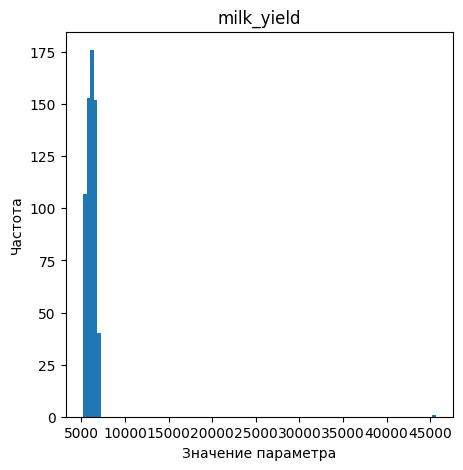

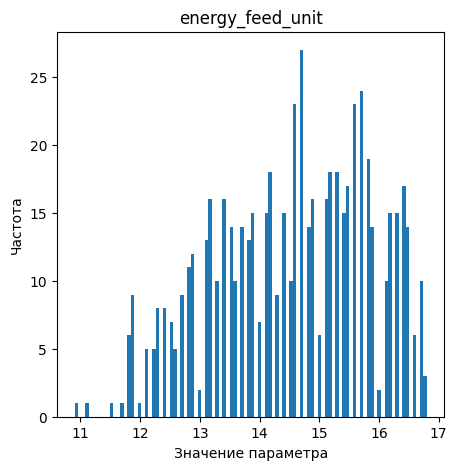

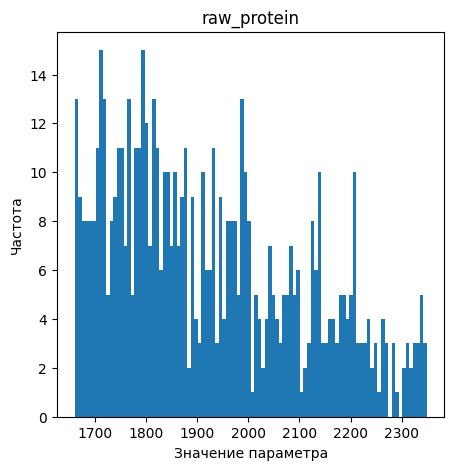

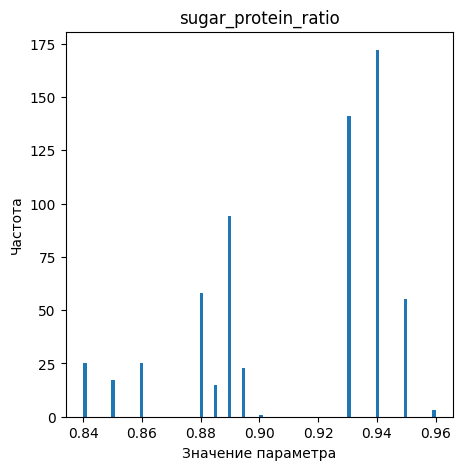

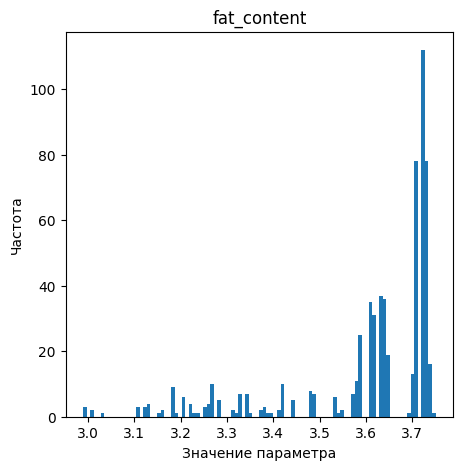

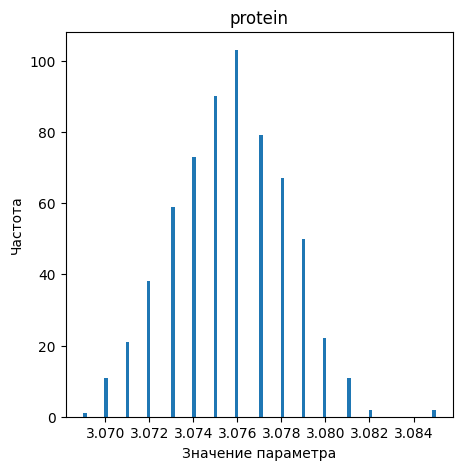

In [33]:
# Количественные признаки
for col in ferma_main[num_cols].columns:
    ferma_main[col].plot(kind='hist', bins=100, figsize=(5, 5))
    plt.title(col)
    plt.xlabel('Значение параметра')
    plt.ylabel('Частота')
    plt.show()

In [34]:
ferma_main.describe()

,id,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,fat_content,protein
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


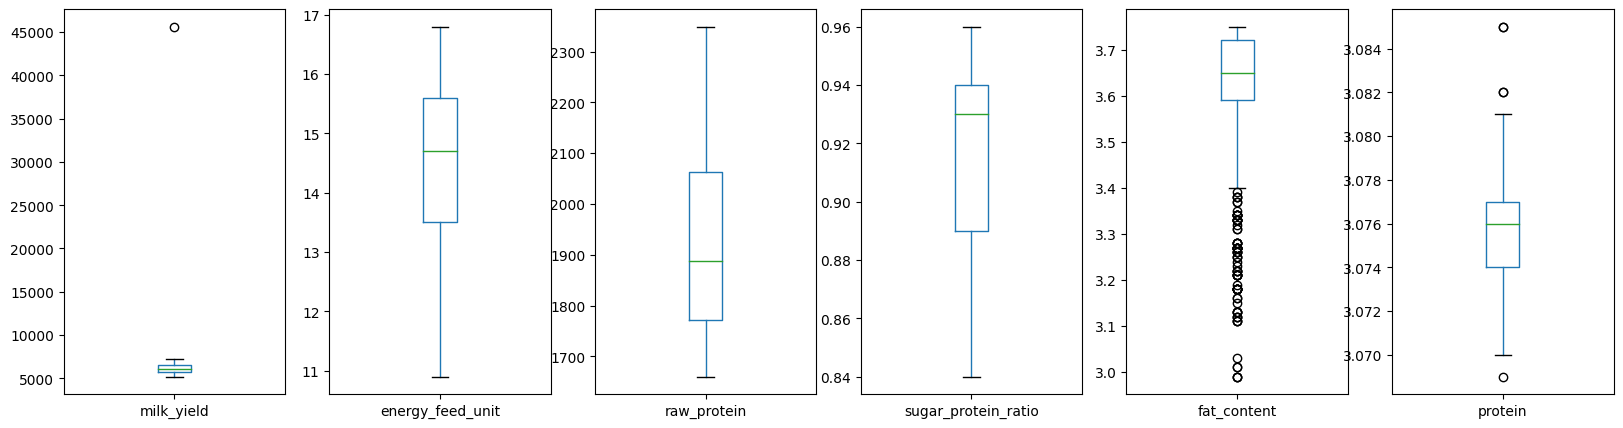

In [35]:
ferma_main[num_cols].plot(
    kind='box',
    subplots=True,
    layout=(1, 6),
    figsize=(20,5)
);

In [36]:
ferma_main.query('milk_yield>10000')

,id,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,type_of_pasture,daddy_breed,fat_content,protein,taste_of_milk,age
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,True,более_2_лет


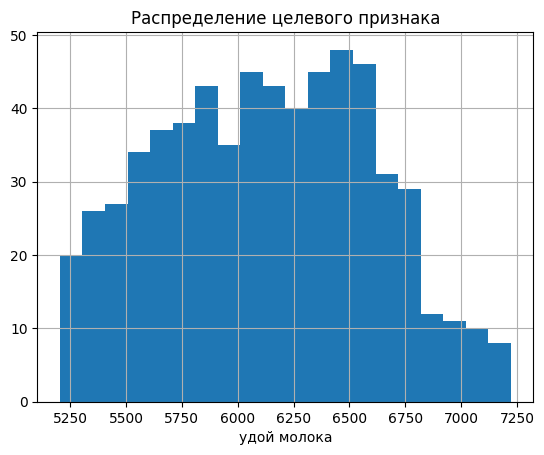

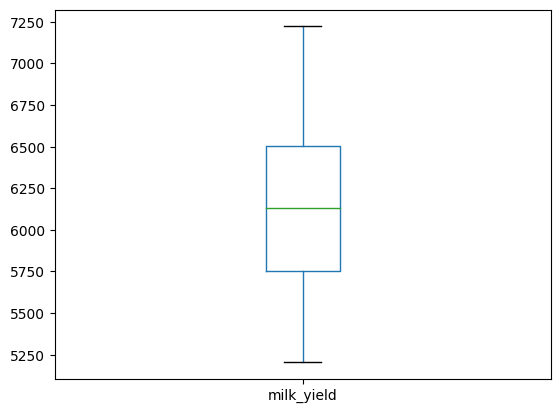

In [37]:
# Выевил одну корову с аномально большим удоем - удоляем строку
ferma_main = ferma_main[(ferma_main['milk_yield']!=45616)]
ferma_main['milk_yield'].hist(bins=20);
plt.title('Распределение целевого признака')
plt.xlabel('удой молока')
plt.show()
ferma_main['milk_yield'].plot(kind='box');
plt.show()

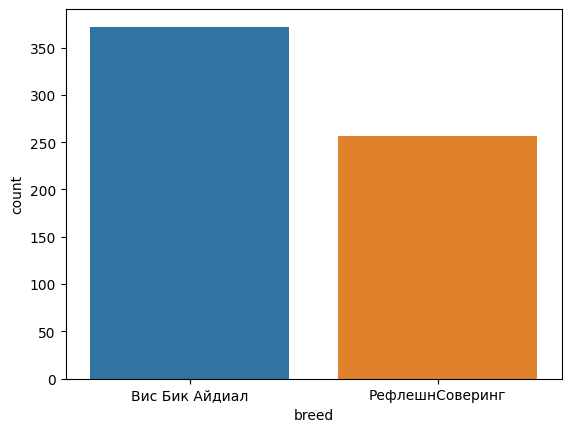

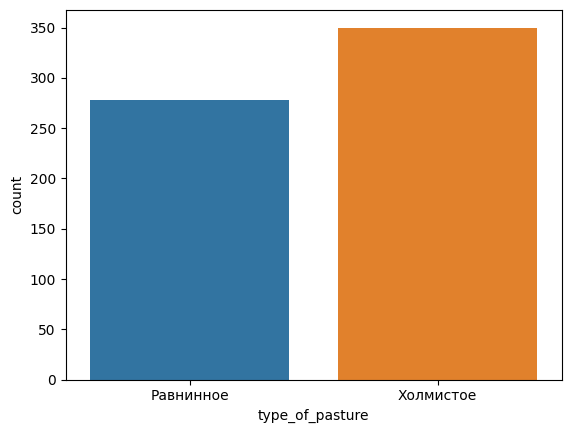

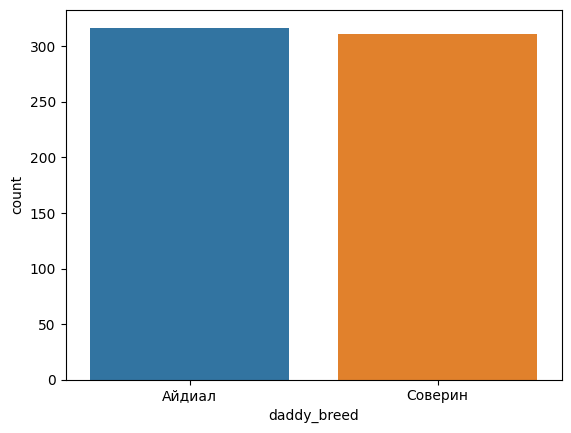

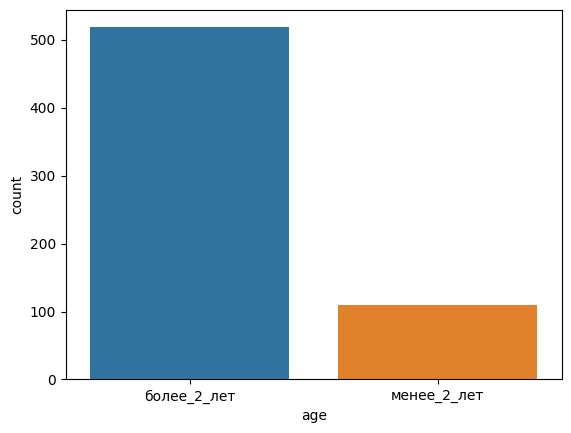

In [38]:
# Категориальные признаки
for i in cat_cols:
    sns.countplot(x=i, data = ferma_main)
    plt.show()

При анлизе гистограмм и боксплотов видно:
* на некоторых гистораммах вижу бимодальность данных
* выявил одну корову с аномально большим удоем - удалил.
* данные о вкусе молока достаточно сбалансированы.
* мало данных о коровах до 2 лет.
* судя по гисторгамме параметра СПО (Сахаро-протеиновое соотношение) и Жирность напращивается вывод, что этот параметр нужно преобразовать в котегориальный на 2-3 части.

## Корреляционный анализ

Расчитаем коэффициенты корреляции между всеми признаками. В связи с тем, что данные распределены ненормально используем коэффициент корреляции Спирмена

In [39]:
ferma_main[num_cols].corr(method='spearman')

,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,fat_content,protein
milk_yield,1.000000,0.765144,0.437543,0.787904,0.688506,-0.005701
energy_feed_unit,0.765144,1.000000,0.384747,0.741962,0.686973,-0.013321
raw_protein,0.437543,0.384747,1.000000,0.485890,0.392822,0.229051
sugar_protein_ratio,0.787904,0.741962,0.485890,1.000000,0.701044,0.109924
fat_content,0.688506,0.686973,0.392822,0.701044,1.000000,0.043125
protein,-0.005701,-0.013321,0.229051,0.109924,0.043125,1.000000


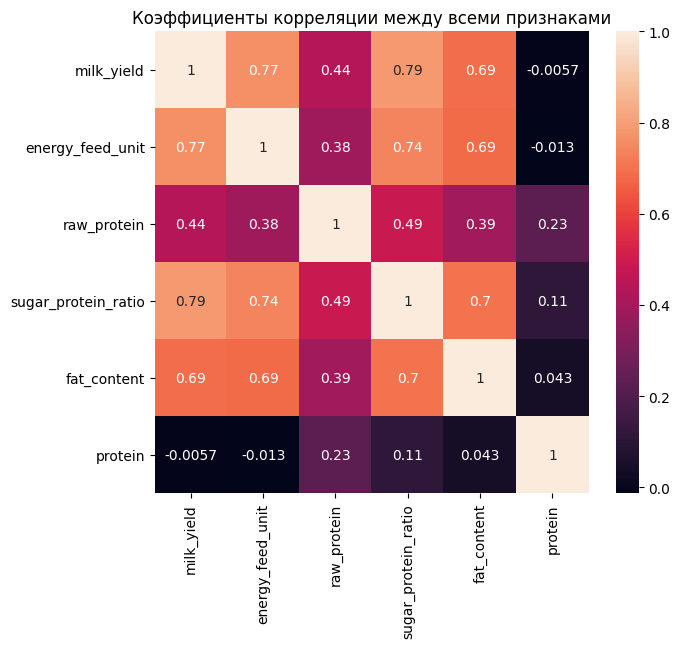

In [40]:
plt.figure(figsize=(7,6))
sns.heatmap(ferma_main[num_cols].corr(method='spearman'), annot=True)
plt.title('Коэффициенты корреляции между всеми признаками');

Выводы по коэффициентам корреляции:
* очень высоких корреляций (0.9 +) не видно. Мультиколлинеарность между входными признаками не наблюдается. 

* есть подозрение на нелинейность связи удоя с: спо, жирностью, эке

* по спо: постоянная зависимоть на разных уровнях. до 0.92 - одна зависимость с целевой. После 0.92 - иная. Просто видим две группы. Надо ввести новую категориальную переменную: "менее 0.92"/"более 0.92".

* по жирности: постоянная зависимоть на разных уровнях. Наблюдается три зона с разной зависимостью с целевой: до 3.5, и ещё две - на графике не видно. надо определить границу.

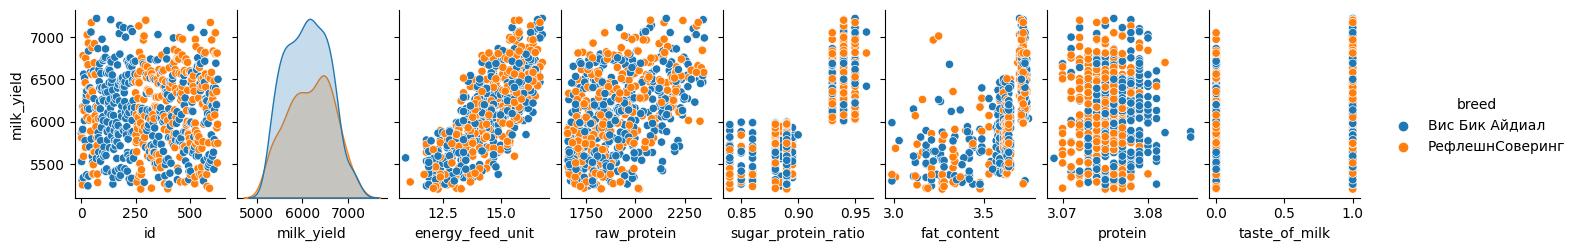

In [41]:
# Построим диграммы рассеяния для признака и всех количественных признаков с учётом значения категориальных признаков.
sns.pairplot(data=ferma_main, y_vars='milk_yield', hue='breed', aspect=0.7);

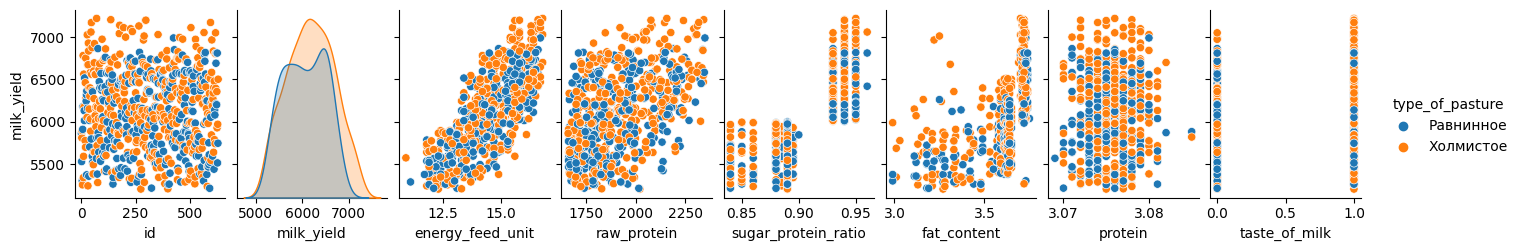

In [42]:
sns.pairplot(data=ferma_main, y_vars='milk_yield', hue='type_of_pasture', aspect=0.7);

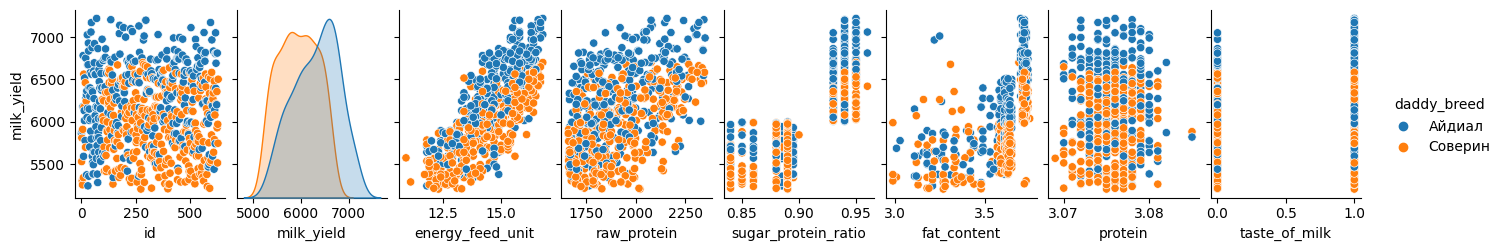

In [43]:
sns.pairplot(data=ferma_main, y_vars='milk_yield', hue='daddy_breed', aspect=0.7);

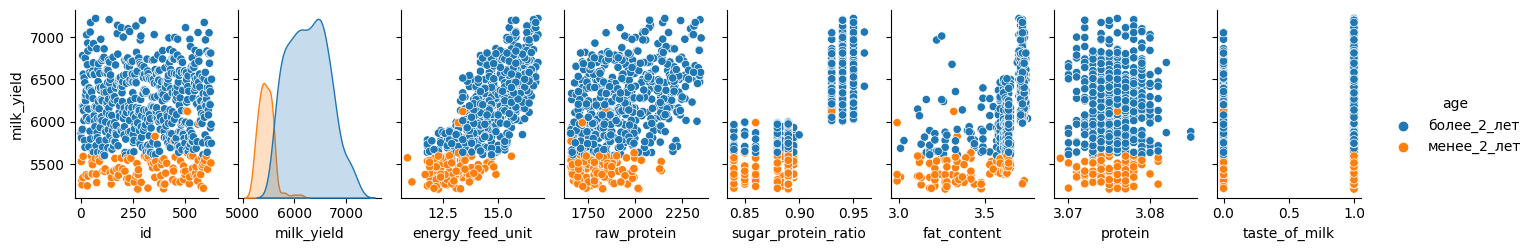

In [44]:
sns.pairplot(data=ferma_main, y_vars='milk_yield', hue='age', aspect=0.7);

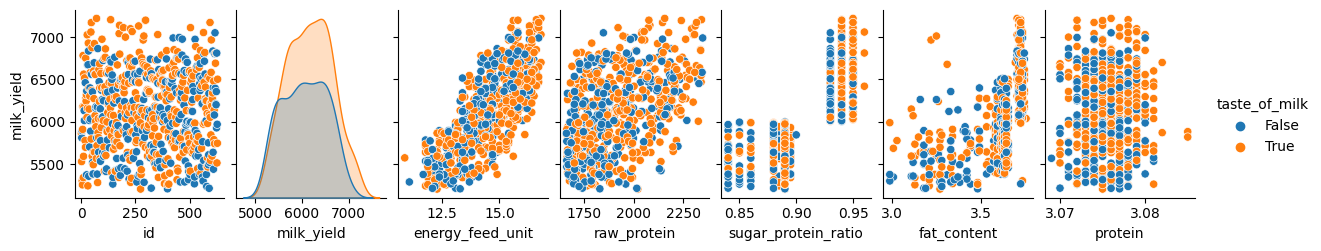

In [45]:
sns.pairplot(data=ferma_main, y_vars='milk_yield', hue='taste_of_milk', aspect=0.7);

Выводы по диаграмамм рассеяния:
* есть не линейность с спо и жирностью во всех группах
* порода папы сильно влияет на удой
* эке - вижу кривезну, здесь возможна квадратичность
* возраст влият на удой. Более молодые коровы меньше дают молока.
* спо только для возрастных коров используется

## Обучение модели линейной регрессии

### Первая модель

Решено убрать признаки белок и жирность из данных для модели. Белок никак не влияет на удой коров при коэффициенте корреляции около нуля. Жирность - этот признак влияетне линейно. Если его использовать, то в качестве категориального признака. Также убераем из данных вкус молока он пока пригодится. 

In [46]:
# Подготовим данные для первой модели
ferma_main_first = ferma_main.drop(columns=['fat_content', 'protein', 'taste_of_milk'])
ferma_main_first.head()

,id,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,type_of_pasture,daddy_breed,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет


In [47]:
# Разделим данные на тренировочные и тестовые
X = ferma_main_first.drop(columns=['milk_yield'])
y = ferma_main_first['milk_yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [48]:
# Проверка разбиения на доли 
X_train.shape

(439, 8)

In [49]:
# Создаем списки категориальных и количественных признаков
num_cols = ['energy_feed_unit', 'raw_protein', 'sugar_protein_ratio']
cat_cols = ['breed', 'type_of_pasture', 'daddy_breed', 'age']

In [50]:
# Масштабируем количественные признаки для тренировочной и тестовой выборок с помощью стандартизации.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

In [51]:
# Закодируем категориальные признаки в тренировочной и тестовой выборках.
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_cols]) 
X_test_ohe = encoder.transform(X_test[cat_cols])
encoder_col_names = encoder.get_feature_names()

In [52]:
# Создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_cols)
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [53]:
# Обучаем первую модель. Считаем метрику r2.
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)
r2 = r2_score(y_test, predictions)
r2

0.7953280165721989

In [54]:
# Считаем метрики MSE, RMSE и MAE
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
metrics = pd.DataFrame([[mse, rmse, mae, r2]], columns=['mse', 'rmse', 'mae', 'r2'])
metrics

,mse,rmse,mae,r2
0,43047.635871,207.479242,164.230225,0.795328


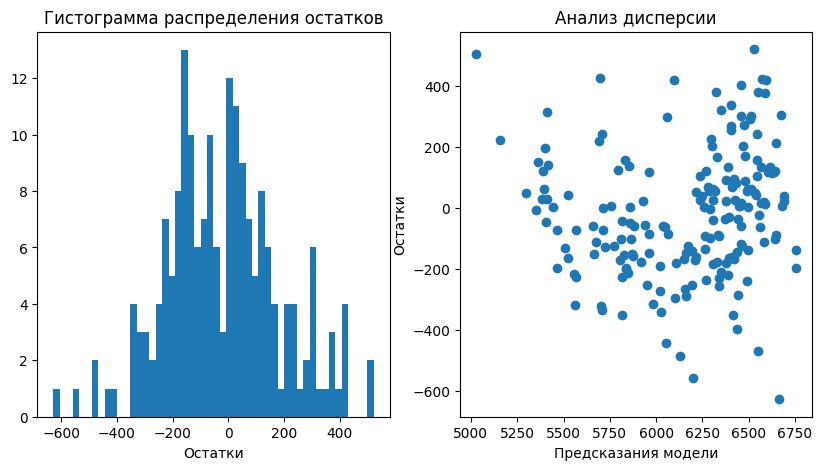

In [55]:
# Проведем анализ остатков
residuals = y_test - predictions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Разработал превую модель. Для сравнения с другими моделями расчтитал метрику r2 = 0.7970514394224899. Также посчитал метрики mse, rmse, mae. 

Анализ остатков показал: 
* на гистограмме распределения остатков видно несимметричное мультимодальное распределение
* при анализе десперсии разброс значений остатков примерно одинаковый

Для улучшения модели требуется необходимо добавить в модель дополнительные признаки и рансформировать данные имеющихся признаков.

### Вторая модель

Решено признак  СПО преобразовать в котегориальный до и после 0,92. А признак ЭКЕ для устраниение квадратичности преобразовать возведением в степень 2.

In [56]:
# Подготовим данные для второй модели
ferma_main_second = ferma_main_first

In [57]:
#  признак СПО
ferma_main_second.loc[(ferma_main_second['sugar_protein_ratio'] > 0.92), 'spr'] = 'более_0.92'
ferma_main_second.loc[(ferma_main_second['sugar_protein_ratio'] <= 0.92), 'spr'] = 'менее_0.92'

In [58]:
ferma_main_second['spr'] = ferma_main_second['spr'].astype('category')

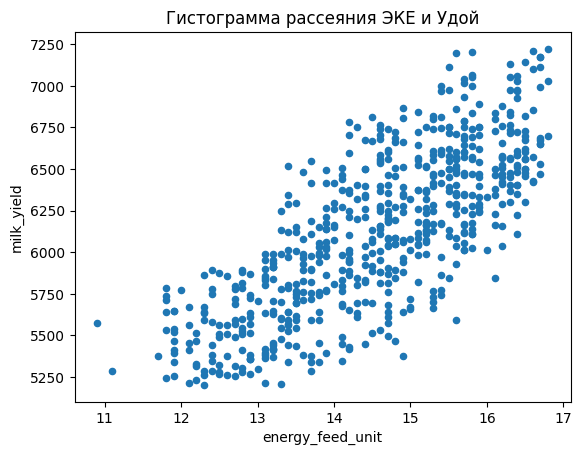

In [59]:
# Посмотрим на гистограмму рассеяния ЭКЕ и Удой
ferma_main.plot(x='energy_feed_unit', y='milk_yield', kind='scatter')
plt.title('Гистограмма рассеяния ЭКЕ и Удой');

In [60]:
# признак ЭКЕ
ferma_main_second['efu_sqr'] = ferma_main_second['energy_feed_unit'] ** 2

In [61]:
# уберем лишние признаки
ferma_main_second = ferma_main_second.drop(columns=['energy_feed_unit', 'sugar_protein_ratio'])
ferma_main_second.head()

,id,milk_yield,raw_protein,breed,type_of_pasture,daddy_breed,age,spr,efu_sqr
0,1,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,менее_0.92,201.64
1,2,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,менее_0.92,163.84
2,3,5810,1854,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,менее_0.92,196.00
3,4,5895,2012,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,менее_0.92,153.76
4,5,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,менее_0.92,163.84


In [62]:
# Разделим данные на тренировочные и тестовые
X = ferma_main_second.drop(columns=['milk_yield'])
y = ferma_main_second['milk_yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [63]:
# Создаем списки категориальных и количественных признаков
num_cols = ['raw_protein', 'efu_sqr']
cat_cols = ['breed', 'type_of_pasture', 'daddy_breed', 'age', 'spr']

In [64]:
# Масштабируем количественные признаки для тренировочной и тестовой выборок с помощью стандартизации.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

In [65]:
# Закодируем категориальные признаки в тренировочной и тестовой выборках.
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_cols]) 
X_test_ohe = encoder.transform(X_test[cat_cols])
encoder_col_names = encoder.get_feature_names()

In [66]:
# Создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_cols)
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [67]:
# Обучаем модель. Считаем метрику r2.
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)
r2 = r2_score(y_test, predictions)
r2

0.8306443150225614

In [68]:
# Считаем метрики MSE, RMSE и MAE
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
metrics.loc[len(metrics.index )] = [mse, rmse, mae, r2]
metrics

,mse,rmse,mae,r2
0,43047.635871,207.479242,164.230225,0.795328
1,35619.735235,188.731914,145.892556,0.830644


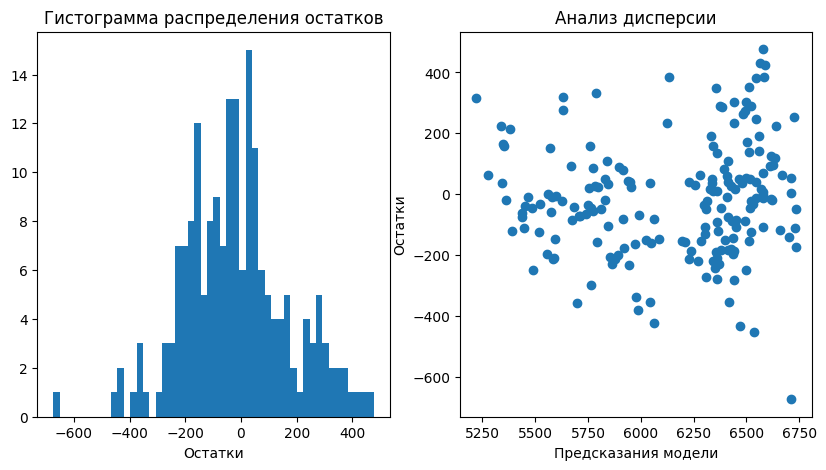

In [69]:
# Проведем анализ остатков
residuals = y_test - predictions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Разработал вторую модель. Добавил два признака, трансформировав старые. Для сравнения с другими моделями расчтитал метрику r2 = 0.8317447949675325. Эта модель работает лучше первой. Также посчитал метрики mse, rmse, mae. 

Анализ остатков показал: 
* на гистограмме распределения остатков распределение не нормальное (бимодальности, плюс смещение среднего влево от нуля).
* при анализе десперсии разброс значений остатков примерно одинаковый

Для улучшения модели добавим признак имя папы и применим это в третей модели.

### Третья модель

In [70]:
# В данные добавим признак имя папы
ferma_main_third = ferma_main_second.merge(ferma_dad, on='id')
ferma_main_third.head()

,id,milk_yield,raw_protein,breed,type_of_pasture,daddy_breed,age,spr,efu_sqr,dads_name
0,1,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,менее_0.92,201.64,Буйный
1,2,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,менее_0.92,163.84,Соловчик
2,3,5810,1854,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,менее_0.92,196.00,Барин
3,4,5895,2012,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,менее_0.92,153.76,Буйный
4,5,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,менее_0.92,163.84,Барин


In [71]:
# Разделим данные на тренировочные и тестовые
X = ferma_main_third.drop(columns=['milk_yield'])
y = ferma_main_third['milk_yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [72]:
# Создаем списки категориальных и количественных признаков
num_cols = ['raw_protein', 'efu_sqr']
cat_cols = ['breed', 'type_of_pasture', 'daddy_breed', 'age', 'spr', 'dads_name']

In [73]:
# Масштабируем количественные признаки для тренировочной и тестовой выборок с помощью стандартизации.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

In [74]:
# Закодируем категориальные признаки в тренировочной и тестовой выборках.
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_cols]) 
X_test_ohe = encoder.transform(X_test[cat_cols])
encoder_col_names = encoder.get_feature_names()

In [75]:
# Создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_cols)
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [76]:
# Обучаем модель. Считаем метрику r2.
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)
r2 = r2_score(y_test, predictions)
r2

0.8341980546667563

In [77]:
# Считаем метрики MSE, RMSE и MAE
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
metrics.loc[len(metrics.index )] = [mse, rmse, mae, r2]
metrics

,mse,rmse,mae,r2
0,43047.635871,207.479242,164.230225,0.795328
1,35619.735235,188.731914,145.892556,0.830644
2,34872.294927,186.741251,145.357052,0.834198


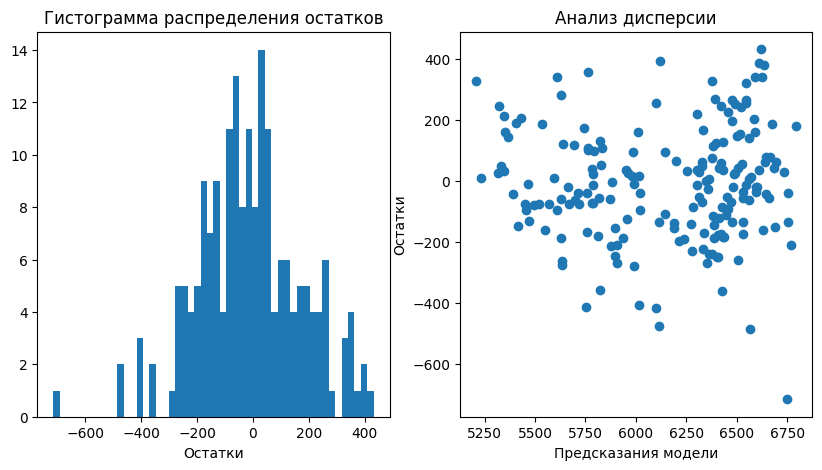

In [78]:
# Проведем анализ остатков
residuals = y_test - predictions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Разработал третью модель. Добавил признак имя папы. Для сравнения с другими моделями расчтитал метрику r2 = 0.8357651577899127. Эта модель работает лучше предыдущих. Также посчитал метрики mse, rmse, mae. 

Анализ остатков показал: 
* на гистограмме среднее и медиана совпадают, не смещены относительно 0. Но бимодальность присутствуют.
* при анализе десперсии разброс значений остатков примерно одинаковый

In [79]:
# Сравним качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.
metrics

,mse,rmse,mae,r2
0,43047.635871,207.479242,164.230225,0.795328
1,35619.735235,188.731914,145.892556,0.830644
2,34872.294927,186.741251,145.357052,0.834198


In [80]:
st.norm.interval(alpha=0.05, loc=np.mean(predictions), scale=st.sem(predictions))

(6146.838007223846, 6150.650342355343)

Проанализировав качество трех моделей делаем вовод, что третья модель работает лучше. Также посчитал доверительный интервал для третей модели. Существует вероятность 95%, что доверительный интервал [6146, 6150] содержит истинный средний удой коров.

In [81]:
# спрогнозируйте удой коров, которых фермер хочет купить.
# добавим в таблицу cow_buy новые признаки + 5%
energy_feed_unit = (ferma_main['energy_feed_unit'].mean() * 0.05 + ferma_main['energy_feed_unit'].mean())**2
cow_buy.insert (0, 'efu_sqr', energy_feed_unit)

In [82]:
raw_protein = ferma_main['raw_protein'].mean() * 0.05 + ferma_main['raw_protein'].mean()
cow_buy.insert (0, 'raw_protein', raw_protein)

In [83]:
ferma_main['sugar_protein_ratio'].mean() * 0.05 + ferma_main['sugar_protein_ratio'].mean()

0.9587436305732483

In [84]:
cow_buy.insert (0, 'spr', 'более_0.92')

In [85]:
ferma_main_third.head()

,id,milk_yield,raw_protein,breed,type_of_pasture,daddy_breed,age,spr,efu_sqr,dads_name
0,1,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,менее_0.92,201.64,Буйный
1,2,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,менее_0.92,163.84,Соловчик
2,3,5810,1854,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,менее_0.92,196.00,Барин
3,4,5895,2012,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,менее_0.92,153.76,Буйный
4,5,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,менее_0.92,163.84,Барин


In [86]:
cow_buy = cow_buy[['raw_protein', 'breed', 'type_of_pasture', 'daddy_breed',
                   'age', 'spr', 'efu_sqr', 'dads_name']]

In [87]:
cow_buy.head()

,raw_protein,breed,type_of_pasture,daddy_breed,age,spr,efu_sqr,dads_name
0,2019.947532,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,более_0.92,233.361138,Геркулес
1,2019.947532,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,более_0.92,233.361138,Буйный
2,2019.947532,РефлешнСоверинг,Равнинное,Соверин,более_2_лет,более_0.92,233.361138,Барин
3,2019.947532,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,более_0.92,233.361138,Буйный
4,2019.947532,РефлешнСоверинг,Равнинное,Айдиал,более_2_лет,более_0.92,233.361138,Буйный


In [88]:
# Масштабируем количественные признаки для выборки cow_buy с помощью стандартизации.
X_test_scaled = scaler.transform(cow_buy[num_cols])

In [89]:
# Закодируем категориальные признаки в выборке cow_buy.
X_test_ohe = encoder.transform(cow_buy[cat_cols])
encoder_col_names = encoder.get_feature_names()

In [90]:
# Создаём тестовый датафрейм из закодированных и отмасштабированных данных
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_cols)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [94]:
# Обучаем модель. Считаем метрику r2.
predictions = model_lr.predict(X_test)

In [100]:
# Получим прогноз удоя коров.
cow_buy = cow_buy.copy()
cow_buy['milk_yield'] = predictions
cow_buy

,raw_protein,breed,type_of_pasture,daddy_breed,age,spr,efu_sqr,dads_name,milk_yield
0,2019.947532,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,более_0.92,233.361138,Геркулес,6597.740034
1,2019.947532,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,более_0.92,233.361138,Буйный,6368.721781
2,2019.947532,РефлешнСоверинг,Равнинное,Соверин,более_2_лет,более_0.92,233.361138,Барин,6278.052374
3,2019.947532,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,более_0.92,233.361138,Буйный,6598.303665
4,2019.947532,РефлешнСоверинг,Равнинное,Айдиал,более_2_лет,более_0.92,233.361138,Буйный,6545.682256
5,2019.947532,РефлешнСоверинг,Равнинное,Соверин,менее_2_лет,более_0.92,233.361138,Геркулес,6408.322411
6,2019.947532,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,более_0.92,233.361138,Геркулес,6597.740034
7,2019.947532,Вис Бик Айдиал,Равнинное,Соверин,более_2_лет,более_0.92,233.361138,Буйный,6576.846566
8,2019.947532,РефлешнСоверинг,Равнинное,Соверин,более_2_лет,более_0.92,233.361138,Барин,6278.052374
9,2019.947532,РефлешнСоверинг,Холмистое,Айдиал,менее_2_лет,более_0.92,233.361138,Буйный,6390.178880


## Обучение модели логистической регрессии

Подбирая признаки для модели логистической регресии я остановился на наборе:
* num_cols = ['milk_yield', 'efu_sqr', 'raw_protein', 'sugar_protein_ratio', 'energy_feed_unit']
* cat_cols = ['breed', 'type_of_pasture', 'daddy_breed', 'age', 'spr', 'dads_name']

С этим набором добился accuracy:  0.675

In [101]:
# Подготовим данные
ferma_main_log = ferma_main
ferma_main_log.loc[(ferma_main_log['sugar_protein_ratio'] > 0.92), 'spr'] = 'более_0.92'
ferma_main_log.loc[(ferma_main_log['sugar_protein_ratio'] <= 0.92), 'spr'] = 'менее_0.92'
ferma_main_log['efu_sqr'] = ferma_main_log['energy_feed_unit'] ** 2

In [102]:
ferma_main_log = ferma_main_log.merge(ferma_dad, on='id')

In [103]:
# разбиваем признаки на входные и целевой
X = ferma_main_log.drop(columns=['taste_of_milk'])
y = ferma_main_log['taste_of_milk']

# разбиваем данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    random_state=RANDOM_STATE
)

In [104]:
# Создаем списки категориальных и количественных признаков
num_cols = ['milk_yield', 'efu_sqr', 'raw_protein', 'sugar_protein_ratio', 'energy_feed_unit']
cat_cols = ['breed', 'type_of_pasture', 'daddy_breed', 'age', 'spr', 'dads_name']

In [105]:
# Масштабируем количественные признаки для тренировочной и тестовой выборок с помощью стандартизации.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

In [106]:
# Закодируем категориальные признаки в тренировочной и тестовой выборках.
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_cols]) 
X_test_ohe = encoder.transform(X_test[cat_cols])
encoder_col_names = encoder.get_feature_names()

In [107]:
# Создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_cols)
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [108]:
# Обучаем модель. Получаем прогнозные метки классов
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [109]:
# Получим метрики
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('accuracy: ',round(acc ,3))
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

accuracy:  0.675
recall:  0.92
precision:  0.648


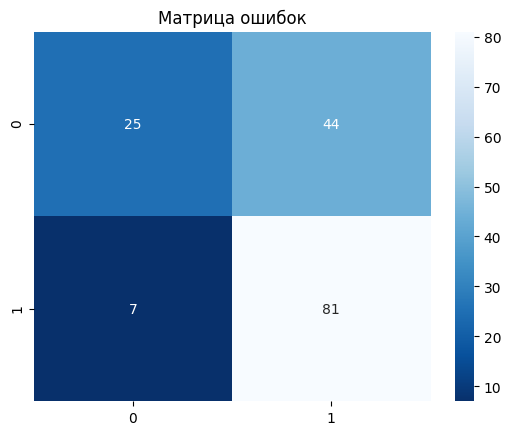

In [110]:
# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок');

Так как фермер хочет чтобы молоко было вкусным и ни как иначе, ошибку первого порядка (равна 49) необходимо уменьшить до нуля.

In [111]:
# Подбираем порог при котором метрика precision равна  1
THRESHOLD = 0.807
preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds)],
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.522293
recall,0.147727
precision,1.000000


In [112]:
# добавим в таблицу cow_buy недостоющие признаки
cow_buy.insert (0, 'energy_feed_unit',
                ferma_main['energy_feed_unit'].mean() + ferma_main['energy_feed_unit'].mean() * 0.05)
cow_buy.insert (0, 'sugar_protein_ratio',
                ferma_main['sugar_protein_ratio'].mean() + ferma_main['sugar_protein_ratio'].mean() * 0.05)

In [113]:
cow_buy.head()

,sugar_protein_ratio,energy_feed_unit,raw_protein,breed,type_of_pasture,daddy_breed,age,spr,efu_sqr,dads_name,milk_yield
0,0.958744,15.276162,2019.947532,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,более_0.92,233.361138,Геркулес,6597.740034
1,0.958744,15.276162,2019.947532,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,более_0.92,233.361138,Буйный,6368.721781
2,0.958744,15.276162,2019.947532,РефлешнСоверинг,Равнинное,Соверин,более_2_лет,более_0.92,233.361138,Барин,6278.052374
3,0.958744,15.276162,2019.947532,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,более_0.92,233.361138,Буйный,6598.303665
4,0.958744,15.276162,2019.947532,РефлешнСоверинг,Равнинное,Айдиал,более_2_лет,более_0.92,233.361138,Буйный,6545.682256


In [114]:
# Масштабируем количественные признаки для выборки cow_buy с помощью стандартизации.
X_test_scaled = scaler.transform(cow_buy[num_cols])

In [115]:
# Закодируем категориальные признаки в выборке cow_buy.
X_test_ohe = encoder.transform(cow_buy[cat_cols])
encoder_col_names = encoder.get_feature_names()

In [116]:
# Создаём тестовый датафреймы из закодированных и отмасштабированных данных
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_cols)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [117]:
# Получим прогноз вкуса молока коров
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
cow_buy['y_proba'] = y_proba
cow_buy['taste'] = cow_buy['y_proba'].apply(lambda x: 1 if x>= 0.807 else 0)

## Итоговые выводы

In [118]:
# Датафрейм с предскозаниями моделей
cow_buy

,sugar_protein_ratio,energy_feed_unit,raw_protein,breed,type_of_pasture,daddy_breed,age,spr,efu_sqr,dads_name,milk_yield,y_proba,taste
0,0.958744,15.276162,2019.947532,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,более_0.92,233.361138,Геркулес,6597.740034,0.853186,1
1,0.958744,15.276162,2019.947532,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,более_0.92,233.361138,Буйный,6368.721781,0.721458,0
2,0.958744,15.276162,2019.947532,РефлешнСоверинг,Равнинное,Соверин,более_2_лет,более_0.92,233.361138,Барин,6278.052374,0.733027,0
3,0.958744,15.276162,2019.947532,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,более_0.92,233.361138,Буйный,6598.303665,0.843656,1
4,0.958744,15.276162,2019.947532,РефлешнСоверинг,Равнинное,Айдиал,более_2_лет,более_0.92,233.361138,Буйный,6545.682256,0.727514,0
5,0.958744,15.276162,2019.947532,РефлешнСоверинг,Равнинное,Соверин,менее_2_лет,более_0.92,233.361138,Геркулес,6408.322411,0.668541,0
6,0.958744,15.276162,2019.947532,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,более_0.92,233.361138,Геркулес,6597.740034,0.853186,1
7,0.958744,15.276162,2019.947532,Вис Бик Айдиал,Равнинное,Соверин,более_2_лет,более_0.92,233.361138,Буйный,6576.846566,0.743093,0
8,0.958744,15.276162,2019.947532,РефлешнСоверинг,Равнинное,Соверин,более_2_лет,более_0.92,233.361138,Барин,6278.052374,0.733027,0
9,0.958744,15.276162,2019.947532,РефлешнСоверинг,Холмистое,Айдиал,менее_2_лет,более_0.92,233.361138,Буйный,6390.178880,0.828535,1


In [119]:
# Отберитеv коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.
cow_buy.query('milk_yield > 6000 and taste == 1')

,sugar_protein_ratio,energy_feed_unit,raw_protein,breed,type_of_pasture,daddy_breed,age,spr,efu_sqr,dads_name,milk_yield,y_proba,taste
0,0.958744,15.276162,2019.947532,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,более_0.92,233.361138,Геркулес,6597.740034,0.853186,1
3,0.958744,15.276162,2019.947532,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,более_0.92,233.361138,Буйный,6598.303665,0.843656,1
6,0.958744,15.276162,2019.947532,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,более_0.92,233.361138,Геркулес,6597.740034,0.853186,1
9,0.958744,15.276162,2019.947532,РефлешнСоверинг,Холмистое,Айдиал,менее_2_лет,более_0.92,233.361138,Буйный,6390.178880,0.828535,1
12,0.958744,15.276162,2019.947532,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,более_0.92,233.361138,Геркулес,6597.740034,0.853186,1
13,0.958744,15.276162,2019.947532,Вис Бик Айдиал,Холмистое,Соверин,менее_2_лет,более_0.92,233.361138,Барин,6102.466868,0.853883,1
15,0.958744,15.276162,2019.947532,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,более_0.92,233.361138,Буйный,6598.303665,0.843656,1


В результате работы моделей 7 коров фермер может купить из стада на продажу с минимальным риском для себя. Согласна настройкам нашей модели риск купить корову с не вкусным молоком 0%. 

При улучшения качества регрессионной модели я использовал способ добавления новых признаков и трансформацию. С помощью метрик выбирал лучшую модель.

Можно повысить качество модели. Можно попробывать признак жирность сделать категориальным. Также можно собрать еще данные о коровах и добавить новые признаки.

При анализе рисков и экономических  расчетов для моделей классификации важны метрики recall и precision для настройки модели с помощью изменения порогов. Это возможность позволяет минимизировать ошибки, которые мешают достижению поставленных целей.

## Общий вывод:

Вывел первые строки данных. Изучил общую информацию о датафрейме. Осуществил предобработку данных. Переименовал названия столбцов.

Изменил типы данных категориальные, численные (по менял запятую на точку), также изменил целевой показатель о вкусе молока на булевый. Удалил явные дупликаты во всех таблицах. Выявил неявные дупликаты - исправил.

Превел исследовательский анализ на графиках каждого параметра. На некоторых гистораммах бимодальность данных. Выявил одну корову с аномально большим удоем - удалил. Данные о вкусе молока достаточно сбалансированы. Мало данных о коровах до 2 лет. Судя по гисторгамме параметра СПО (Сахаро-протеиновое соотношение) и Жирность напращивается вывод, что этот параметр нужно преобразовать в котегориальный на 2-3 части.

Корреляционный анализ паказал: Мультиколлинеарность между входными признаками не наблюдается. Есть подозрение на нелинейность связи удоя с: спо, жирностью, эке. 

Обучил три модели линейной регрессии и выевил лучшую. Получил прогноз удоя коров.

Обучил модель логистической регрессии. Получил прогноз вкуса молока коров. Отобрал коров из стада для покупки.